<a href="https://colab.research.google.com/github/Rish-3/Ytube-nwp/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd


In [113]:
df=pd.read_csv('/content/laptops_train.csv')

In [114]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [116]:
df.duplicated().sum()

0

In [117]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [118]:
df=df.drop(columns='Operating System Version')

In [119]:
df['Screen Size']=df['Screen Size'].str.replace('"','').astype('float32')
df['RAM']=df['RAM'].str.replace('GB','').astype('int32')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')


In [120]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    float32
 4   Screen            977 non-null    object 
 5   CPU               977 non-null    object 
 6   RAM               977 non-null    int32  
 7    Storage          977 non-null    object 
 8   GPU               977 non-null    object 
 9   Operating System  977 non-null    object 
 10  Weight            977 non-null    float32
 11  Price             977 non-null    float64
dtypes: float32(2), float64(1), int32(1), object(8)
memory usage: 80.3+ KB


# EDA and Feature Engineering

In [122]:
import matplotlib.pyplot as plt
import seaborn as sb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

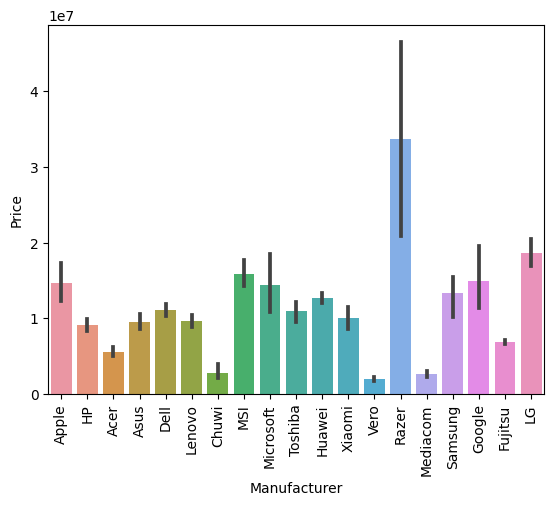

In [123]:
sb.barplot(x=df['Manufacturer'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: >

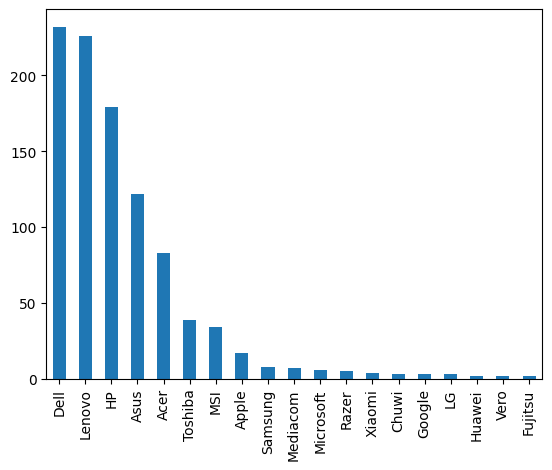

In [124]:
df['Manufacturer'].value_counts().plot(kind='bar')

<Axes: >

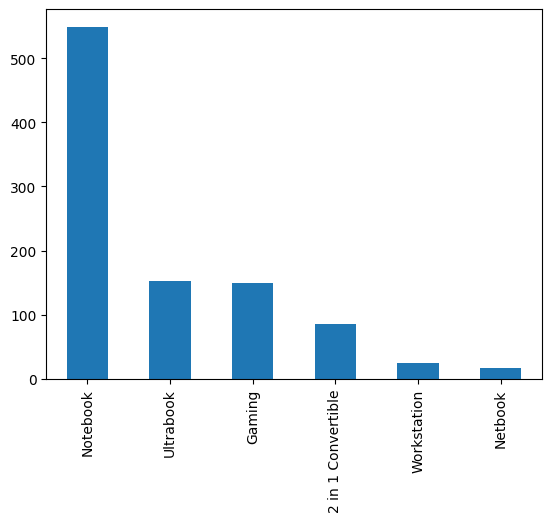

In [125]:
df['Category'].value_counts().plot(kind='bar')

<ipython-input-126-9885df120a7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Screen Size'])


<Axes: xlabel='Screen Size', ylabel='Density'>

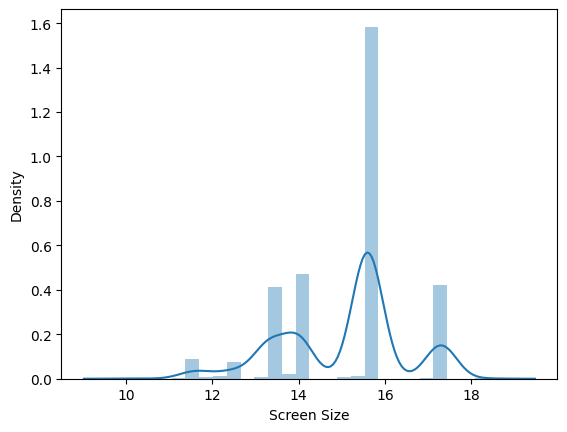

In [126]:
sb.distplot(df['Screen Size'])

<Axes: xlabel='Screen Size', ylabel='Price'>

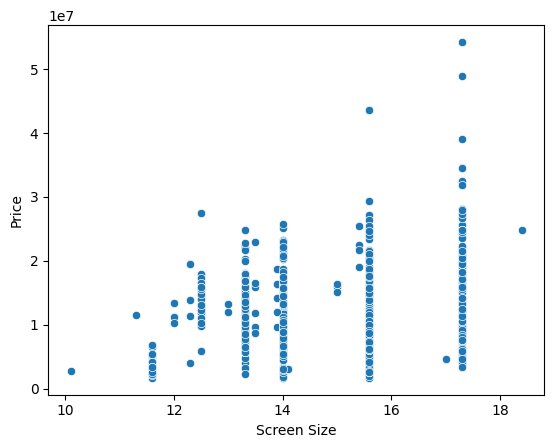

In [127]:
sb.scatterplot(x=df['Screen Size'],y=df['Price'])

In [128]:
df['Screen'].value_counts()

Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                           

In [129]:
df['Touchscreen']=df['Screen'].apply(lambda x:1 if 'Touchscreen' in x  else 0)

In [130]:
df['IPS Panel']=df['Screen'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [131]:
df['Screen'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
972,Full HD 1920,1080
973,Full HD 1920,1080
974,Full HD 1920,1080
975,IPS Panel Full HD 1920,1080


In [132]:
new = df['Screen'].str.split('x',n=1,expand=True)

regular experation for x residual

In [133]:
new[0]=new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [134]:
new.head()

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600


In [135]:
df['x_res']=new[0]
df['y_res']=new[1]

In [136]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,IPS Panel,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0,1,2560,1600


In [137]:
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [138]:
df.corr()['Price']

<ipython-input-138-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
IPS Panel      0.234718
x_res          0.579901
y_res          0.577594
Name: Price, dtype: float64

ppi is pixel per inches

In [139]:
df['PPI']=(((df['x_res'])**2 + (df['y_res'])**2 ))**0.5/df['Screen Size'].astype('float')

In [140]:
df.corr()['Price']

<ipython-input-140-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
IPS Panel      0.234718
x_res          0.579901
y_res          0.577594
PPI            0.499022
Name: Price, dtype: float64

In [141]:
df=df.drop(columns=['x_res','y_res','Screen Size'])

In [142]:
df=df.drop(columns=['Screen'])

In [143]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64

In [144]:
df['processor']=df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [145]:
df['processor'].value_counts()

Intel Core i7               386
Intel Core i5               330
Intel Core i3               105
Intel Celeron Dual           55
Intel Pentium Quad           21
AMD A9-Series 9420           11
Intel Core M                 10
Intel Celeron Quad            8
AMD A6-Series 9220            6
Intel Atom x5-Z8350           5
AMD A12-Series 9720P          4
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
Intel Xeon E3-1535M           2
Intel Pentium Dual            2
AMD A10-Series 9620P          2
AMD A8-Series 7410            2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A6-Series A6-9220         1
Intel Atom x5-Z8300           1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
Intel Atom Z8350              1
AMD A6-Series 7310            1
AMD E-Series E2-9000          1
AMD E-Series E2-6110          1
AMD E-Series 9000e            1
AMD E-Series 7110             1
Intel At

In [146]:
def processor_type(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
      if text.split()[0]=='Intel':
        return 'other Intel processor'
      else:
          return 'AMD Processor'


In [147]:
df['processor_type']=df['processor'].apply(processor_type)

In [148]:
df.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,IPS Panel,PPI,processor,processor_type
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0,1,226.983001,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,0,0,127.677938,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,0,0,141.211995,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,0,1,220.534629,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0,1,226.983001,Intel Core i5,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i7'),
  Text(1, 0, 'Intel Core i5'),
  Text(2, 0, 'other Intel processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'AMD Processor')])

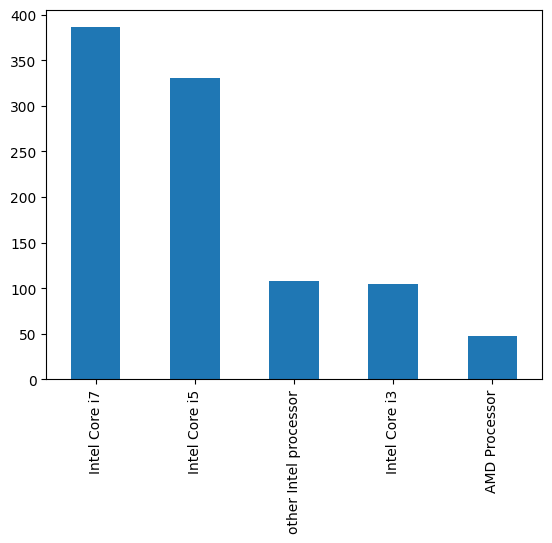

In [149]:
df['processor_type'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'other Intel processor')])

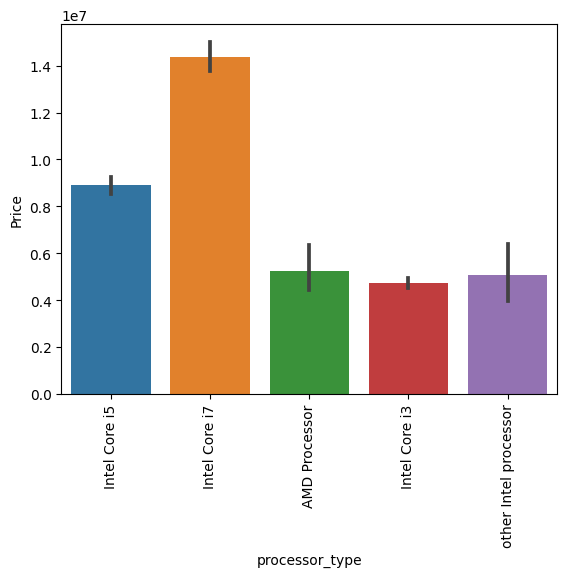

In [150]:
sb.barplot(x=df['processor_type'],y=df['Price'])
plt.xticks(rotation='vertical')

In [151]:
df.drop(columns=['CPU','processor'],inplace=True)

<Axes: >

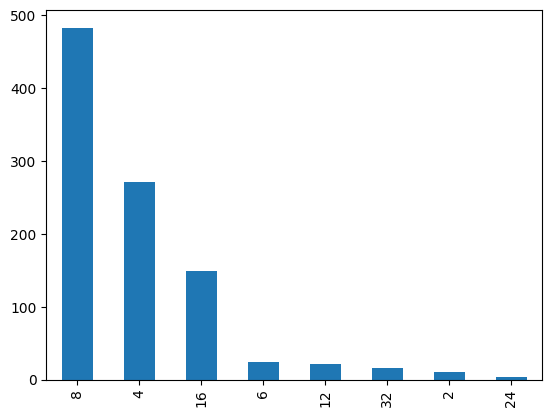

In [152]:
df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

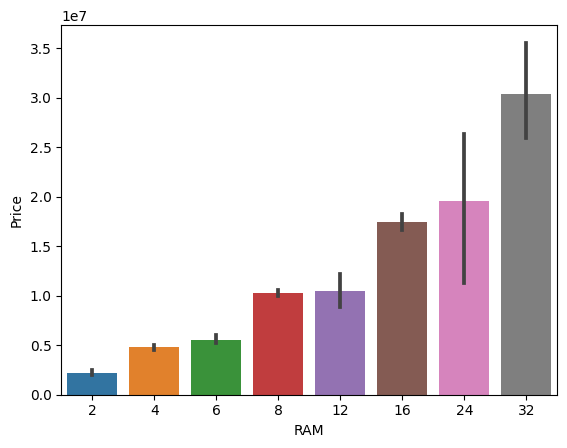

In [153]:
sb.barplot(x=df['RAM'],y=df['Price'])

storage divided into 3 new columns



In [154]:
df[' Storage'].value_counts()

256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD      1
2

In [155]:
df[' Storage']=df[' Storage'].astype(str).replace('\.0','', regex=True)
df[' Storage']=df[' Storage'].str.replace('GB','')
df[' Storage']=df[' Storage'].str.replace('TB','000')

In [156]:
df[' Storage'].str.split('+',n=1,expand=True)

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
972,256 SSD,1000 HDD
973,256 SSD,None
974,256 SSD,1000 HDD
975,128 SSD,1000 HDD


In [157]:
new=df[' Storage'].str.split('+', n=1, expand=True)
df['s1']=new[0]
df['s1']=df['s1'].str.strip()

In [158]:
df['s2']=new[1]



In [159]:
df['HDD1']=df['s1'].apply(lambda x:1 if "HDD" in x else 0)
df['SSD1']=df['s1'].apply(lambda x:1 if "SSD" in x else 0)
df['Hybrid1']=df['s1'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Flash Storage1']=df['s1'].apply(lambda x:1 if "Flash Storage" in x else 0)


In [160]:
df['s2']

0            None
1            None
2            None
3            None
4            None
          ...    
972      1000 HDD
973          None
974      1000 HDD
975      1000 HDD
976          None
Name: s2, Length: 977, dtype: object

In [161]:
df['s1']=df['s1'].str.replace(r'\D','')
df['s2'].fillna("0", inplace =True)



<ipython-input-161-182e8eadbcdd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['s1']=df['s1'].str.replace(r'\D','')


In [162]:
df["HDD2"]=df["s2"].apply(lambda x: 1 if "HDD" in x else 0)
df["SSD2"]=df['s2'].apply(lambda x:1 if "SSD" in x else 0)
df["Hybrid2"]=df['s2'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Flash_Storage2']=df['s2'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [163]:
df['s2']=df['s2'].str.replace(r'\D','')
df['s1']=df['s1'].astype(int)
df['s2']=df['s2'].astype(int)

<ipython-input-163-16c702902284>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['s2']=df['s2'].str.replace(r'\D','')


In [164]:
df["HDD"]=(df['s1']*df['HDD1']+df['s2']*df['HDD2'])
df["SSD"]=(df['s1']*df['SSD1']+df['s2']*df['SSD2'])
df["Hybrid"]=(df['s1']*df['Hybrid1']+df['s2']*df['Hybrid2'])
df['Flash Storage']=(df['s1']*df['Flash Storage1'] + df['s2']*df['Flash_Storage2'])

df.drop(columns=['HDD1','HDD2','SSD1','SSD2','Hybrid1','Hybrid2','Flash Storage1','Flash_Storage2','s1','s2',' Storage'], inplace=True)

In [165]:
df.head()

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Weight,Price,Touchscreen,IPS Panel,PPI,processor_type,HDD,SSD,Hybrid,Flash Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,7993374.48,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,5112900.00,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,22563005.40,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0,1,226.983001,Intel Core i5,0,256,0,0


In [166]:
df.corr()['Price']

<ipython-input-166-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM              0.764005
Weight           0.224415
Price            1.000000
Touchscreen      0.206893
IPS Panel        0.234718
PPI              0.499022
HDD             -0.088832
SSD              0.670753
Hybrid          -0.011725
Flash Storage   -0.037147
Name: Price, dtype: float64

In [167]:
df.drop(columns=['Hybrid', 'Flash Storage'] , inplace=True)

In [168]:
df['GPU'].value_counts()

Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: GPU, Length: 98, dtype: int64

In [169]:
df['gpu_brand']=df['GPU'].apply(lambda x:x.split()[0])

In [170]:
df['gpu_brand'].value_counts()

Intel     525
Nvidia    310
AMD       142
Name: gpu_brand, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

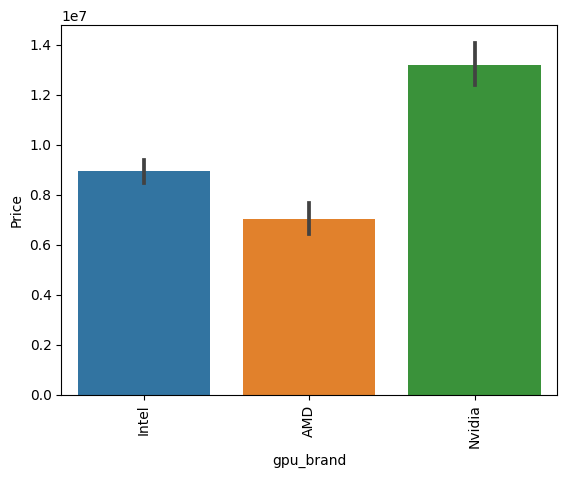

In [171]:
sb.barplot(x=df['gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')


In [172]:
df.drop(columns=['GPU'], inplace=True)

In [173]:
df['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows'),
  Text(3, 0, 'Mac OS'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Chrome OS')])

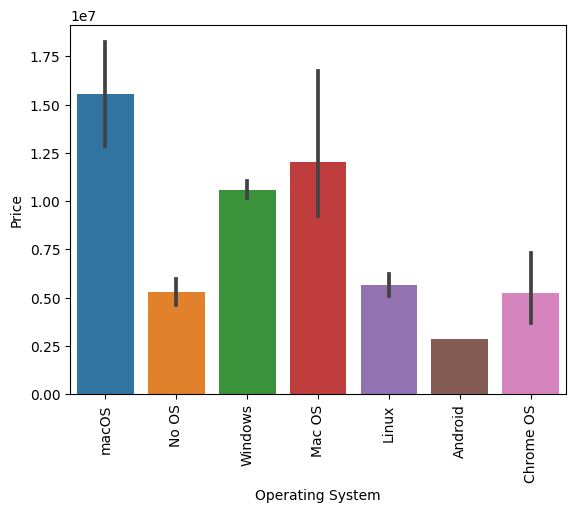

In [174]:
sb.barplot(x=df['Operating System'], y=df['Price'])
plt.xticks(rotation='vertical')

In [175]:
def catg_os(inp):
  if inp == 'Windows':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS':
    return 'Mac'
  else:
    return 'other/No OS/Linux/Android'

In [176]:
df['OPSY']=df['Operating System'].apply(catg_os)

<Axes: xlabel='OPSY', ylabel='Price'>

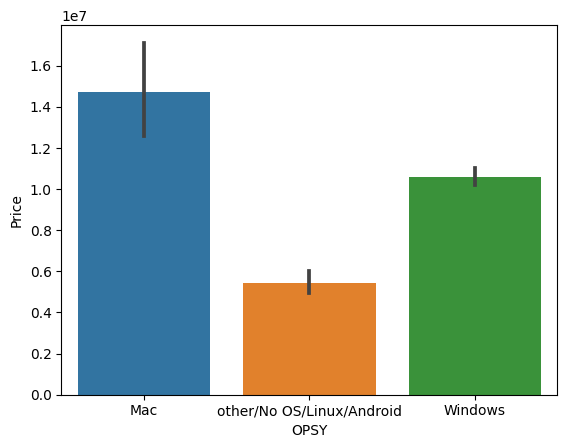

In [177]:
sb.barplot(x=df['OPSY'], y=df['Price'])

<Axes: xlabel='Weight', ylabel='Price'>

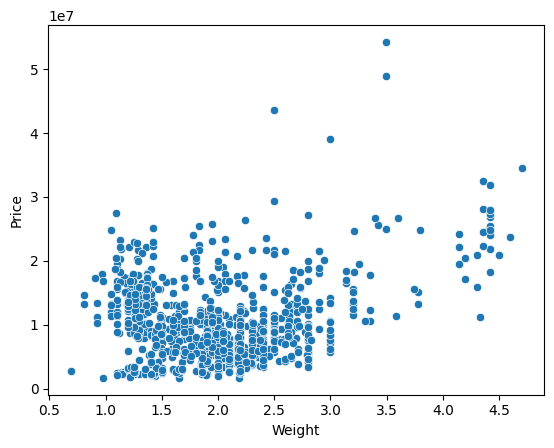

In [178]:
sb.scatterplot(x=df['Weight'], y=df['Price'])

In [179]:
df.corr()

<ipython-input-179-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RAM,Weight,Price,Touchscreen,IPS Panel,PPI,HDD,SSD
RAM,1.000000,0.390161,0.764005,0.126847,0.168639,0.327041,0.101992,0.597963
Weight,0.390161,1.000000,0.224415,-0.300813,-0.015458,-0.295244,0.512642,-0.053245
Price,0.764005,0.224415,1.000000,0.206893,0.234718,0.499022,-0.088832,0.670753
Touchscreen,0.126847,-0.300813,0.206893,1.000000,0.093985,0.439640,-0.191454,0.239800
IPS Panel,0.168639,-0.015458,0.234718,0.093985,1.000000,0.310021,-0.108458,0.213331
PPI,0.327041,-0.295244,0.499022,0.439640,0.310021,1.000000,-0.285921,0.522086
HDD,0.101992,0.512642,-0.088832,-0.191454,-0.108458,-0.285921,1.000000,-0.392978
SSD,0.597963,-0.053245,0.670753,0.239800,0.213331,0.522086,-0.392978,1.000000


In [180]:
df.drop(columns=['Operating System','Model Name'], inplace=True)

<ipython-input-181-5bf5719ea17b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr())


<Axes: >

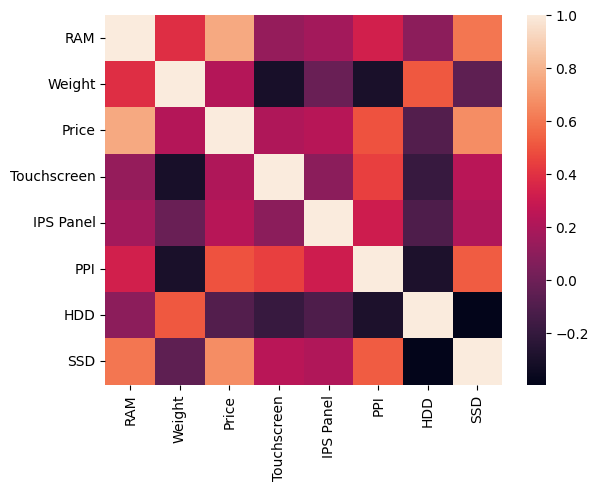

In [181]:
sb.heatmap(df.corr())

<ipython-input-182-b0575cd036ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

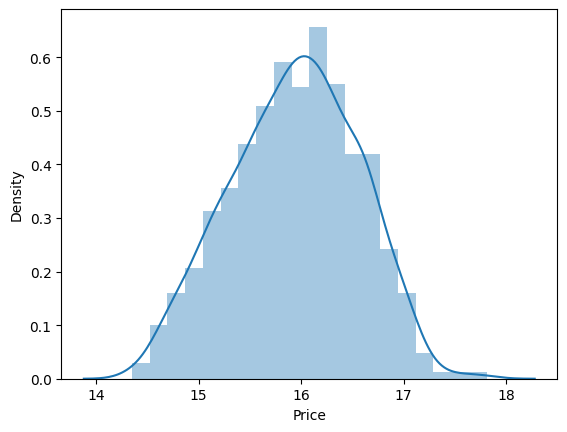

In [182]:
sb.distplot(np.log(df['Price']))

In [183]:
x= df.drop(columns=['Price'])
y= np.log(df['Price'])

In [184]:
y

0      16.293101
1      15.894124
2      15.447277
3      16.931822
4      16.590447
         ...    
972    17.030282
973    16.166177
974    16.718454
975    15.979439
976    16.002661
Name: Price, Length: 977, dtype: float64

In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [186]:
! pip install Pipeline

In [187]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [188]:
!pip install neighbours

ERROR: Could not find a version that satisfies the requirement neighbours (from versions: none)
ERROR: No matching distribution found for neighbours


In [189]:
! pip install DecisionTree

In [190]:
! pip install xgboost

In [191]:
! pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [192]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error


In [193]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [194]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
], remainder='passthrough')
step2= LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
 ])

In [195]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7703953281920846
MAE 0.22543250512845064


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [196]:
np.exp(0.22)

1.2460767305873808

**Ridge Regression**

In [197]:
step1=ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.7685059191888461
MSE 0.22543821867558783


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Lasso Regression**

In [198]:
step1=ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
    ],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 0.7714336759422826
MSE 0.22522924969537292


**Random Forest Regressor**

In [199]:

step1 =ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,
                            max_depth=15,
                            max_features=0.75,
                            max_samples=0.5,
                            random_state=3
                            )
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('mse',mean_absolute_error(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 0.8641091991594553
mse 0.16894280109370555


# **KNN**

In [200]:
step1=ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.7546447608477054
MSE 0.21691435396677253


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Decision Tree**

In [201]:
step=ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=True,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=30)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))


R2 score 0.7477935423082168
MSE 0.21687305711091498


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**SVM**

In [202]:
step1=ColumnTransformer(transformers=[
      ('col_trf',OneHotEncoder(sparse=True,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=SVR(kernel='linear')
pipe=Pipeline([
      ('step1',step1),
      ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 0.7201952992586123
MSE 0.2498828043289367


**XGBRegressor**

In [203]:
step1=ColumnTransformer(transformers=[
      ('col_trf',OneHotEncoder(sparse=True,drop='first'),[0,1,7,10,11])
  ],remainder='passthrough')
step2= XGBRegressor(n_estimators=500)
pipe=Pipeline([
      ('step1',step1),
      ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score 0.875626267006909
MSE 0.16404499681536258


**conclusion and R2 Score **

* svm
* decision tree

*   random forest
*   KNN

*   XGBoost
*   







**Exporting model**

In [204]:
import pickle
pickle.dumb(df,open('df.pkl','web'))
pickle.dumb(pipe,open('pipe.pkl','web'))